In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import linspace
#from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [36]:
df = pd.read_csv('data/height_weight.csv')
# Since height is in pound and weight is in inch.
# We're doing a bit conversion here
df.loc[:,'Height'] *= 0.0254
df.loc[:,'Weight'] *= 0.45359237

In [37]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
display(df_male)
display(df_female)

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
4995,Male,1.749046,80.345294
4996,Male,1.751925,72.250564
4997,Male,1.702150,90.353514
4998,Male,1.817566,84.325502


,Gender,Height,Weight
5000,Female,1.496333,46.306486
5001,Female,1.656842,64.095243
5002,Female,1.609573,59.439380
5003,Female,1.637792,58.137620
5004,Female,1.569545,58.867856
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


Text(0, 0.5, 'Height (m)')

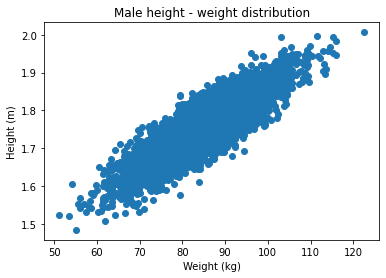

In [38]:
plt.scatter(df_male['Weight'], df_male['Height'])
plt.title("Male height - weight distribution")
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')

Text(0, 0.5, 'Height (m)')

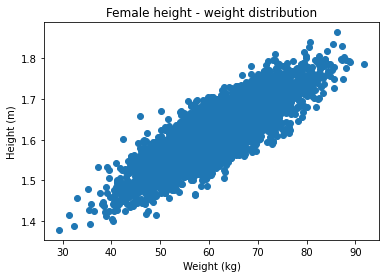

In [39]:
plt.scatter(df_female['Weight'], df_female['Height'])
plt.title("Female height - weight distribution")
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')

#### Predicting on male data set
##### From height predict weight

In [40]:
df_male_train = df_male[:4000]
df_male_test = df_male[4000:]
data_train = np.array(df_male_train['Height'])
label_train = np.array(df_male_train['Weight'])

In [41]:
label_train.shape

(4000,)

In [42]:
data_train_normalizer = BatchNormalization(axis=1)


In [43]:

model = Sequential([
        data_train_normalizer,
        Dense(units=1)
])


In [44]:
#predict with untrained model
model.predict(data_train[:10])

array([[-1.029033  ],
       [-0.9584524 ],
       [-1.0326991 ],
       [-0.9995467 ],
       [-0.97377896],
       [-0.9371478 ],
       [-0.9584967 ],
       [-0.9524132 ],
       [-0.93388623],
       [-0.8842446 ]], dtype=float32)

In [45]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

In [46]:
#training model
fit_log = model.fit(data_train, label_train, epochs=10, verbose=1, validation_split=0.2)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 1s 237us/sample - loss: 2900.1695 - val_loss: 212.8386
Epoch 2/10
3200/3200 [==============================] - 0s 41us/sample - loss: 25.2274 - val_loss: 83.1640
Epoch 3/10
3200/3200 [==============================] - 0s 39us/sample - loss: 24.0410 - val_loss: 55.3271
Epoch 4/10
3200/3200 [==============================] - 0s 41us/sample - loss: 23.7609 - val_loss: 37.3386
Epoch 5/10
3200/3200 [==============================] - 0s 48us/sample - loss: 23.8342 - val_loss: 26.6562
Epoch 6/10
3200/3200 [==============================] - 0s 43us/sample - loss: 24.8838 - val_loss: 21.2008
Epoch 7/10
3200/3200 [==============================] - 0s 39us/sample - loss: 23.9362 - val_loss: 20.5438
Epoch 8/10
3200/3200 [==============================] - 0s 42us/sample - loss: 23.8117 - val_loss: 21.1509
Epoch 9/10
3200/3200 [==============================] - 0s 41us/sample - loss: 23.7017 - val_

##### Using only one node doesn't seem to result in good prediction

Text(0.5, 1.0, 'Loss')

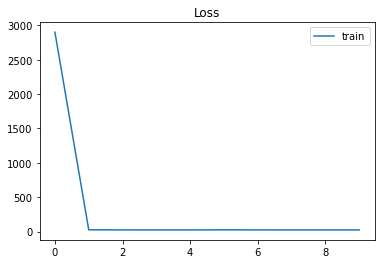

In [47]:
plt.plot(fit_log.history['loss'], label = 'train')
plt.legend()
plt.title('Loss')

In [48]:
pred = model.predict(data_train)#height predicted
pred[:10]

array([[ 99.37094 ],
       [ 83.79625 ],
       [100.17993 ],
       [ 92.864365],
       [ 87.1783  ],
       [ 79.09508 ],
       [ 83.80603 ],
       [ 82.46362 ],
       [ 78.37535 ],
       [ 67.42117 ]], dtype=float32)

In [49]:
df_male_train['Height'][:10]

0    1.875714
1    1.747060
2    1.882397
3    1.821967
4    1.774998
5    1.708227
6    1.747141
7    1.736052
8    1.702281
9    1.611795
Name: Height, dtype: float64

In [72]:
#graphing 
x = linspace(1.5, 2.0, 251)
y = model.predict(x)

def plot_weight(x, y):
    plt.plot(x, y, color='k', label='prediction')
    plt.scatter(df_male_train['Height'], df_male_train['Weight'], label='Observed')
    plt.xlabel('Height (m)')
    plt.ylabel('Weight (kg)')
    plt.legend()

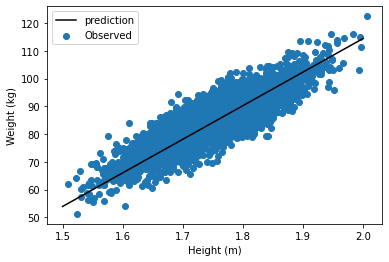

In [73]:
plot_weight(x, y)